# Capstone Project-Suitable location for sushi restaurant in Toronto

### 1. Introduction

#### 1.1 Background

##### Toronto is one of the most diverse city in the world. It is not only populated with diverse ethnicity group, but it is also an international financial center and a popuplar tourist attraction. Denamd for diverse range of food choice is hugh in Toronto and restaurant businness is an attractive investment. As a data scientist, my job is to analyze and provide solutions to potential investors.

#### 1.2 Business Problem:

##### My client, Genki Sushi, which is a sushi chain originated in Japan (and has expanded to international cities like Hong Kong, Singapore, Australia, and USA etc) is interested in opening a branch in Toronto.  They would like to find out the demand for sushi restaurants in Toronto and the best location for opening their new sushi business.

### 2. Data Section

#### Below 3 data source is to be used for the project:

##### 1) Demographic data in Toronto - to explore population of different ethnicity group in Toronto to analyze demand for sushi - we are making an assumption that areas that are densely populated with Japanese/Asian are in high sushi restaurant demand (https://en.wikipedia.org/wiki/Demographics_of_Toronto)
##### 2) List of postal codes of Toronto - for getting postal code data of different neighborhoods in Toronto, by merging neigborhoods with 3), we can cluster different neighborhoods in Toronto (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)
##### 3) List of geo location data for different postal codes in Toronto (http://cocl.us/Geospatial_data)
##### 4) Get venue data from foursquare.com - using location data from 2) and 3) to find out distribution of sushi restaurants in Toronto, then we can cluster and analyze which location is the most popular for sushi restaurants  (https://api.foursquare.com)

#### Import neccessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

#### Import postal codes from 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' into pandas dataframe

In [2]:
pcode_list=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df_pcode=pcode_list[0]
print(df_pcode)

    Postcode           Borough  \
0        M1A      Not assigned   
1        M2A      Not assigned   
2        M3A        North York   
3        M4A        North York   
4        M5A  Downtown Toronto   
5        M5A  Downtown Toronto   
6        M6A        North York   
7        M6A        North York   
8        M7A      Queen's Park   
9        M8A      Not assigned   
10       M9A         Etobicoke   
11       M1B       Scarborough   
12       M1B       Scarborough   
13       M2B      Not assigned   
14       M3B        North York   
15       M4B         East York   
16       M4B         East York   
17       M5B  Downtown Toronto   
18       M5B  Downtown Toronto   
19       M6B        North York   
20       M7B      Not assigned   
21       M8B      Not assigned   
22       M9B         Etobicoke   
23       M9B         Etobicoke   
24       M9B         Etobicoke   
25       M9B         Etobicoke   
26       M9B         Etobicoke   
27       M1C       Scarborough   
28       M1C  

#### Import demographic data from https://en.wikipedia.org/wiki/Demographics_of_Toronto into pandas dataframe

In [3]:
demo_list=pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto ')
df_demo=demo_list[5]
print(df_demo)

   Top 20 Ethnic origins in the City of Toronto  Population (2016)[33]  \
0                                       Chinese                 332830   
1                                       English                 331890   
2                                      Canadian                 323175   
3                                         Irish                 262965   
4                                      Scottish                 256250   
5                                   East Indian                 202675   
6                                       Italian                 182500   
7                                      Filipino                 162605   
8                                        German                 130900   
9                                        French                 122615   
10                                       Polish                 114530   
11                                   Portuguese                 100420   
12                                    

In [4]:
df_demo

,Top 20 Ethnic origins in the City of Toronto,Population (2016)[33],Percentage,Riding with Highest Concentration,Percentage.1
0,Chinese,332830,12.5,Scarborough-Agincourt,47.0
1,English,331890,12.3,Beaches-East York,24.2
2,Canadian,323175,12.0,Beaches-East York,19.7
3,Irish,262965,9.8,Parkdale-High Park,20.0
4,Scottish,256250,9.5,Beaches-East York,18.9
5,East Indian,202675,7.5,Etobicoke North,22.2
6,Italian,182500,6.8,Etobicoke Centre,15.1
7,Filipino,162605,6.0,York Centre,17.0
8,German,130900,4.9,Parkdale-High Park,9.8
9,French,122615,4.6,Parkdale-High Park,8.9


In [5]:
df_demo1=demo_list[4]
print(df_demo1)

   Visible minority and Aboriginal population[30][31][32]  \
                                         Population group   
0                                    European (White)       
1                              Visible minority group       
2                              Visible minority group       
3                              Visible minority group       
4                              Visible minority group       
5                              Visible minority group       
6                              Visible minority group       
7                              Visible minority group       
8                              Visible minority group       
9                              Visible minority group       
10                             Visible minority group       
11                             Visible minority group       
12                             Visible minority group       
13                  Total visible minority population       
14                      

In [42]:
df_demo1

Visible minority and Aboriginal population[30][31][32]  \
                                         Population group   
0                                    European (White)       
1                              Visible minority group       
2                              Visible minority group       
3                              Visible minority group       
4                              Visible minority group       
5                              Visible minority group       
6                              Visible minority group       
7                              Visible minority group       
8                              Visible minority group       
9                              Visible minority group       
10                             Visible minority group       
11                             Visible minority group       
12                             Visible minority group       
13                  Total visible minority population       
14                                   Aboriginal group       
15                                   Aboriginal group       
16                                   Aboriginal group       
17                                   Aboriginal group       
18                                   Aboriginal group       
19                        Total Aboriginal population       
20                                   Total population       

                                                         \
                   Population group.1 Population (2016)   
0                    European (White)           1282750   
1                         South Asian            338965   
2                             Chinese            299460   
3                               Black            239850   
4                            Filipino            152715   
5                      Latin American             77160   
6                                Arab             36030   
7                     Southeast Asian             41645   
8                          West Asian             60325   
9                              Korean             41640   
10                           Japanese             13410   
11           Visible minority, n.i.e.             36975   
12        Multiple visible minorities             47675   
13  Total visible minority population           1385850   
14                      First Nations             14380   
15                              Métis              7270   
16                              Inuit               275   
17                 Aboriginal, n.i.e.               645   
18     Multiple Aboriginal identities               500   
19        Total Aboriginal population             23065   
20                   Total population           2691665   

                                                   \
   % of total population (2016) Population (2011)   
0                         47.7%           1292365   
1                         12.6%            317100   
2                         11.1%            278390   
3                          8.9%            218160   
4                          5.7%            132445   
5                          2.9%             71205   
6                          1.3%             28920   
7                          1.5%             46825   
8                          2.2%             50235   
9                          1.5%             37225   
10                         0.5%             12315   
11                         1.4%             33670   
12                         1.8%             37920   
13                        51.5%           1264395   
14                         0.5%             12990   
15                         0.3%              4875   
16                           0%               305   
17                           0%               920   
18                           0%               180   
19                         0.9%             19265   
20                         100%           2576025   

                     

### From the data above, we can say that Japanese is not within the top 20 ethnic group in Toronto, percentage of population is less than 1.7%.

#### Import geo location information from 'http://cocl.us/Geospatial_data' into pandas dataframe

In [6]:
df_geodata=pd.read_csv('http://cocl.us/Geospatial_data')

In [7]:
df_geodata.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Get neccessary credentials for accessing foursquare.com

In [8]:
CLIENT_ID = '4JYYEXXQO4QR22TBLENKO2VI3QPUR5VWMAVXSXS21UAZHMAH' # your Foursquare ID
CLIENT_SECRET = 'ZSMHKPTVKK5OG2CTS4E1U5Y3GVJ5J3DGR0Y4FJ05GDUCD42A' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4JYYEXXQO4QR22TBLENKO2VI3QPUR5VWMAVXSXS21UAZHMAH
CLIENT_SECRET:ZSMHKPTVKK5OG2CTS4E1U5Y3GVJ5J3DGR0Y4FJ05GDUCD42A


### Cleaning and preparing data

In [9]:
df_pcode.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [10]:
df_pcode.shape

(288, 3)

#### Remove Borough that has the value 'Not assigned'

In [11]:
df_pcode=df_pcode[df_pcode.Borough !='Not assigned']

#### Group Neighborhood that has the same Postcode

In [12]:
df_pcode=df_pcode.groupby(['Postcode','Borough'])['Neighbourhood'].apply(','.join).reset_index()
df_pcode

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


#### Repalce 'Not assigned' Neighborhood value with Borough

In [13]:
df_pcode.loc[df_pcode['Neighbourhood']=='Not assigned','Borough']

85    Queen's Park
Name: Borough, dtype: object

In [14]:
df_pcode['Neighbourhood'].loc[85,3]="Queen's Park"

In [15]:
df_pcode.shape

(103, 3)

In [16]:
df_geodata.rename(columns = {'Postal Code':'Postcode'}, inplace = True)

In [17]:
df_geodata.shape

(103, 3)

##### Now we will merge Neighborhood dataframe with geo location dataframe on common column 'Postcode'

In [18]:
toronto_data=pd.merge(df_pcode,df_geodata,on='Postcode')

In [19]:
toronto_data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Queen's Park,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


#### As my client is particularly interested in the Downtown Toronto area, I only want to keep Downtown Toronto under 'Borough'.

In [20]:
toronto_data=toronto_data[toronto_data.Borough =='Downtown Toronto']
toronto_data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
51,M4X,Downtown Toronto,"Cabbagetown,St. James Town",43.667967,-79.367675
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
53,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
54,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937


In [21]:
toronto_data.reset_index(drop=True)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"Cabbagetown,St. James Town",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
4,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
5,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
6,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
7,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
8,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568
9,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752


In [22]:
toronto_data.shape

(18, 5)

## 3. Methodology

#### In this project, we will be looking for candidates of suitable neighborhood in downtown Toronto for opening a sushi restaurant. We assume that locations where we can find high concentration of sushi restaurants has higher demands for sushi and we can take advantage of the established cluster demographics and people will likely to go there when they want to eat sushi.

#### We will collect restaurant venue data for downtown Toronto from foursquare api, cluster and examine which neighborhoods have high concentration of sushi restaurants.


#### Finally we will visualize the clusters on the map using folium and conclude our findings.

## 4. Analysis

#### Use geopy library to get the latitude and longitude values of Toronto.

In [23]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


#### Create a map of Downtown Toronto with neighborhoods superimposed on top.

In [24]:
# create map of toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Let's explore the first neighborhood in our dataframe.

In [25]:
toronto_data['Neighbourhood'].iloc[0]

'Rosedale'

In [26]:
neighborhood_latitude = toronto_data['Latitude'].iloc[0] # neighborhood latitude value
neighborhood_longitude = toronto_data['Longitude'].iloc[0] # neighborhood longitude value

neighborhood_name = toronto_data['Neighbourhood'].iloc[0] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rosedale are 43.6795626, -79.37752940000001.


#### Get venue for ALL food catergory for the first neighborhood via foursquare api

In [27]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
catergory_food='4d4b7105d754a06374d81259'
catergory_japanese='4bf58dd8d48988d111941735'
catergory_sushi='4bf58dd8d48988d1d2941735'

# create URL
url_all = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    catergory_food, 
    radius, 
    LIMIT)
url_all # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=4JYYEXXQO4QR22TBLENKO2VI3QPUR5VWMAVXSXS21UAZHMAH&client_secret=ZSMHKPTVKK5OG2CTS4E1U5Y3GVJ5J3DGR0Y4FJ05GDUCD42A&v=20180605&ll=43.6795626,-79.37752940000001&categoryId=4d4b7105d754a06374d81259&radius=500&limit=100'

In [28]:
results_all = requests.get(url_all).json()
results_all

{'meta': {'code': 200, 'requestId': '5d67573f396de0003950b41d'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Rosedale',
  'headerFullLocation': 'Rosedale, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'query': 'food',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 43.6840626045, 'lng': -79.37131878274371},
   'sw': {'lat': 43.675062595499995, 'lng': -79.38374001725632}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '59b8fe72a0215b4266a62f8e',
       'name': 'Saigonlotus',
       'location': {'address': '6 st Andrew street',
        'lat': 43.68128069011653,
        'lng': -79.38240051269531,
        'labeledLatLngs': [

In [29]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
venues = results_all['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Saigonlotus,Japanese Restaurant,43.681281,-79.382401


#### Repeat the process for all other neighborhoods

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url_all = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            catergory_food,
            radius, 
            LIMIT)
            
        # make the GET request
        results_all = requests.get(url_all).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results_all])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront,Regent Park
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie


In [33]:
print(toronto_venues.shape)
toronto_venues.head()

(1094, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Saigonlotus,43.681281,-79.382401,Japanese Restaurant
1,"Cabbagetown,St. James Town",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner
2,"Cabbagetown,St. James Town",43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
3,"Cabbagetown,St. James Town",43.667967,-79.367675,F'Amelia,43.667536,-79.368613,Italian Restaurant
4,"Cabbagetown,St. James Town",43.667967,-79.367675,Kingyo Toronto,43.665895,-79.368415,Japanese Restaurant


#### As some of the venues only has a general 'Restaurant' category, to include these venues into sushi category, if the venue name contains 'Sushi' and the venue category is 'Restaurant', we replace the venue category to 'Sushi Restaurant' .

In [34]:
toronto_venues.loc[(toronto_venues['Venue'].str.contains('Sushi')) & (toronto_venues['Venue Category'] == 'Restaurant'), 'Venue Category'] = 'Sushi Restaurant'
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Saigonlotus,43.681281,-79.382401,Japanese Restaurant
1,"Cabbagetown,St. James Town",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner
2,"Cabbagetown,St. James Town",43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
3,"Cabbagetown,St. James Town",43.667967,-79.367675,F'Amelia,43.667536,-79.368613,Italian Restaurant
4,"Cabbagetown,St. James Town",43.667967,-79.367675,Kingyo Toronto,43.665895,-79.368415,Japanese Restaurant
5,"Cabbagetown,St. James Town",43.667967,-79.367675,Murgatroid,43.667381,-79.369311,Restaurant
6,"Cabbagetown,St. James Town",43.667967,-79.367675,Merryberry Cafe + Bistro,43.666630,-79.368792,Café
7,"Cabbagetown,St. James Town",43.667967,-79.367675,Cabbagetown Brew,43.666923,-79.369289,Café
8,"Cabbagetown,St. James Town",43.667967,-79.367675,Absolute Bakery & Café,43.667469,-79.369277,Bakery
9,"Cabbagetown,St. James Town",43.667967,-79.367675,House on Parliament,43.663646,-79.367854,Gastropub


#### We also want to make sure there are nothing looks like a Japanese Restaurant under the general Restaurant category.

In [35]:
toronto_venues.loc[toronto_venues['Venue Category'] == 'Restaurant', 'Venue']

5                                          Murgatroid
13                                      The Pear Tree
25                                          El Charro
34                                           Fabarnak
55                                               Wish
80                                            O. Noir
95                                     Impact Kitchen
115                                       Flame Shack
138                                 JOEY Eaton Centre
149                          Jack Astor's Bar & Grill
157                                  Adega Restaurant
176                                     Market Garden
191                        Hendricks Restaurant & Bar
208                                    Maggies Eatery
209                             Casey's Outdoor Patio
219                                 GEORGE Restaurant
230                                    The Carbon Bar
231                                           Portico
241                         

In [36]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Deli / Bodega,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Cabbagetown,St. James Town",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Cabbagetown,St. James Town",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Cabbagetown,St. James Town",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Cabbagetown,St. James Town",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()
toronto_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Deli / Bodega,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,"Adelaide,King,Richmond",0,5,5,0,1,3,0,0,0,1,3,4,2,0,6,0,1,1,0,0,4,0,0,0,0,0,0,0,1,0,0,2,0,0,0,2,0,1,1,0,0,1,0,3,2,0,1,1,2,1,1,0,0,1,1,0,0,2,1,0,0,1,0,7,5,6,2,0,1,0,0,4,2,0,0,0,4,0,3,0,0
1,Berczy Park,0,1,0,1,1,3,0,1,2,0,1,0,0,0,2,0,0,0,1,1,0,2,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,1,4,0,0,0,0,1,1,0,0,2,0,0,0,0,1,0,0,1,0,0,2,0,3,2,0,0,0,0,3,3,0,0,1,1,0,2,0,0
2,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,"Cabbagetown,St. James Town",0,1,0,0,0,2,0,0,1,0,1,0,0,0,3,1,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
4,Central Bay Street,0,1,0,0,1,1,0,0,0,0,1,3,0,0,6,0,5,0,0,0,2,1,0,1,0,0,0,2,1,0,0,0,0,1,2,1,0,0,0,0,0,2,0,5,2,2,0,1,0,5,1,0,0,0,0,0,0,4,1,0,1,0,1,1,2,5,1,0,1,0,0,1,3,0,0,0,1,0,1,0,0
5,"Chinatown,Grange Park,Kensington Market",0,0,0,0,1,4,0,1,0,0,1,2,1,0,8,2,5,0,2,0,1,0,1,2,4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,2,0,0,0,0,0,1,0,0,1,0,6,5,0
6,Christie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Church and Wellesley,1,2,0,0,0,0,0,0,0,0,1,4,2,0,2,1,1,0,0,1,0,1,0,0,0,0,1,0,2,0,0,0,0,0,0,2,0,0,0,0,0,2,0,1,7,2,0,2,1,1,0,0,0,0,0,0,1,4,0,1,0,0,2,3,0,0,1,0,1,0,0,1,7,0,0,0,1,1,0,2,1
8,"Commerce Court,Victoria Hotel",0,6,3,1,0,4,0,1,0,0,4,2,1,0,9,0,1,0,0,1,3,0,0,0,0,0,0,0,2,0,0,3,1,1,1,3,0,1,1,0,0,0,1,9,3,0,1,0,1,0,0,1,0,1,0,0,0,3,1,0,0,0,0,10,5,1,4,0,1,0,0,3,1,0,0,0,3,0,2,0,0
9,"Design Exchange,Toronto Dominion Centre",0,5,2,0,0,4,0,0,0,0,2,4,1,0,9,0,1,1,0,0,4,1,0,0,0,0,0,0,2,0,0,2,0,1,1,3,0,2,1,0,0,0,1,6,3,0,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,1,8,5,7,4,0,2,0,0,5,3,0,0,0,2,0,2,0,0


In [61]:
toronto_grouped.shape

(18, 82)

In [62]:
toronto_grouped['All']=toronto_grouped.sum(axis=1)
sort_toronto_grouped=toronto_grouped.sort_values(['Sushi Restaurant'], ascending=False)
toronto_sushi=sort_toronto_grouped[['Neighborhood','Sushi Restaurant', 'Japanese Restaurant','All']]
toronto_sushi

,Neighborhood,Sushi Restaurant,Japanese Restaurant,All
7,Church and Wellesley,7,7,63
17,Stn A PO Boxes 25 The Esplanade,5,2,99
16,St. James Town,3,2,81
15,"Ryerson,Garden District",3,3,98
12,"Harbourfront East,Toronto Islands,Union Station",3,2,78
10,"First Canadian Place,Underground city",3,3,100
1,Berczy Park,3,0,49
9,"Design Exchange,Toronto Dominion Centre",3,3,100
4,Central Bay Street,3,2,70
0,"Adelaide,King,Richmond",2,2,95


In [40]:
print('Sum of Restaurant is ', toronto_sushi['All'].sum() )
print('Sum of Japanese Restaurant is ',toronto_sushi['Japanese Restaurant'].sum(), ', total ',toronto_sushi['Japanese Restaurant'].sum()/toronto_sushi['All'].sum()*100, '%')
print('Sum of Sushi Restaurant is ',toronto_sushi['Sushi Restaurant'].sum(), ', total ',toronto_sushi['Sushi Restaurant'].sum()/toronto_sushi['All'].sum()*100, '%')

Sum of Restaurant is  1094
Sum of Japanese Restaurant is  36 , total  3.2906764168190126 %
Sum of Sushi Restaurant is  39 , total  3.5648994515539303 %


In [64]:
toronto_sushi.set_index('Neighborhood',inplace=True)
toronto_sushi

,Sushi Restaurant,Japanese Restaurant,All
Neighborhood,,,
Church and Wellesley,7,7,63
Stn A PO Boxes 25 The Esplanade,5,2,99
St. James Town,3,2,81
"Ryerson,Garden District",3,3,98
"Harbourfront East,Toronto Islands,Union Station",3,2,78
"First Canadian Place,Underground city",3,3,100
Berczy Park,3,0,49
"Design Exchange,Toronto Dominion Centre",3,3,100
Central Bay Street,3,2,70


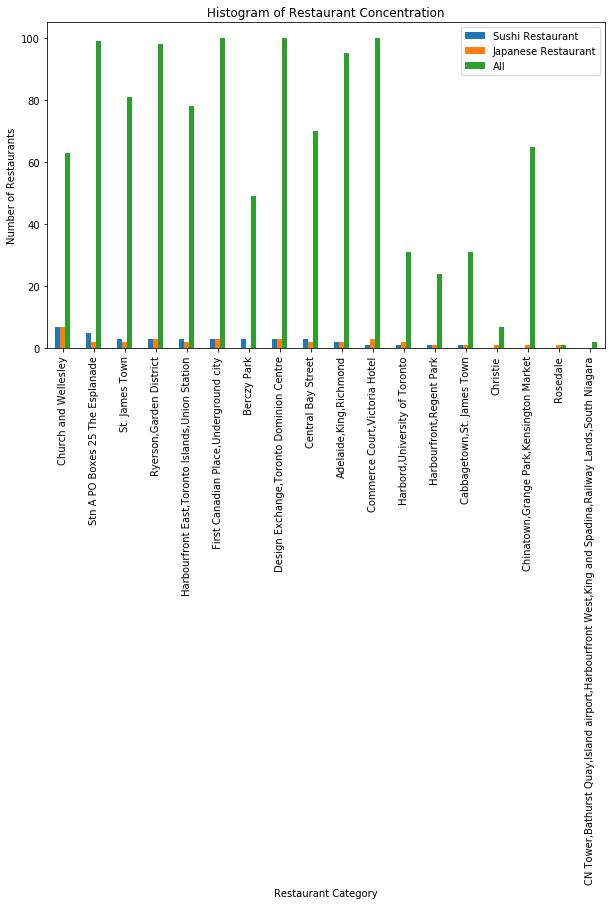

In [66]:
# generate histogram
toronto_sushi.plot(kind='bar', figsize=(10, 6))

plt.title('Histogram of Restaurant Concentration')
plt.ylabel('Number of Restaurants')
plt.xlabel('Restaurant Category')

plt.show()

### From toronto_sushi dataframe, we can see that the top 3 neighborhood which has the highest number of sushi restaurant are: 

In [67]:
toronto_sushi.iloc[:3]

,Sushi Restaurant,Japanese Restaurant,All
Neighborhood,,,
Church and Wellesley,7,7,63
Stn A PO Boxes 25 The Esplanade,5,2,99
St. James Town,3,2,81


In [68]:
del toronto_grouped['All']
toronto_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Deli / Bodega,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,"Adelaide,King,Richmond",0,5,5,0,1,3,0,0,0,1,3,4,2,0,6,0,1,1,0,0,4,0,0,0,0,0,0,0,1,0,0,2,0,0,0,2,0,1,1,0,0,1,0,3,2,0,1,1,2,1,1,0,0,1,1,0,0,2,1,0,0,1,0,7,5,6,2,0,1,0,0,4,2,0,0,0,4,0,3,0,0
1,Berczy Park,0,1,0,1,1,3,0,1,2,0,1,0,0,0,2,0,0,0,1,1,0,2,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,1,4,0,0,0,0,1,1,0,0,2,0,0,0,0,1,0,0,1,0,0,2,0,3,2,0,0,0,0,3,3,0,0,1,1,0,2,0,0
2,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,"Cabbagetown,St. James Town",0,1,0,0,0,2,0,0,1,0,1,0,0,0,3,1,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
4,Central Bay Street,0,1,0,0,1,1,0,0,0,0,1,3,0,0,6,0,5,0,0,0,2,1,0,1,0,0,0,2,1,0,0,0,0,1,2,1,0,0,0,0,0,2,0,5,2,2,0,1,0,5,1,0,0,0,0,0,0,4,1,0,1,0,1,1,2,5,1,0,1,0,0,1,3,0,0,0,1,0,1,0,0
5,"Chinatown,Grange Park,Kensington Market",0,0,0,0,1,4,0,1,0,0,1,2,1,0,8,2,5,0,2,0,1,0,1,2,4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,2,0,0,0,0,0,1,0,0,1,0,6,5,0
6,Christie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Church and Wellesley,1,2,0,0,0,0,0,0,0,0,1,4,2,0,2,1,1,0,0,1,0,1,0,0,0,0,1,0,2,0,0,0,0,0,0,2,0,0,0,0,0,2,0,1,7,2,0,2,1,1,0,0,0,0,0,0,1,4,0,1,0,0,2,3,0,0,1,0,1,0,0,1,7,0,0,0,1,1,0,2,1
8,"Commerce Court,Victoria Hotel",0,6,3,1,0,4,0,1,0,0,4,2,1,0,9,0,1,0,0,1,3,0,0,0,0,0,0,0,2,0,0,3,1,1,1,3,0,1,1,0,0,0,1,9,3,0,1,0,1,0,0,1,0,1,0,0,0,3,1,0,0,0,0,10,5,1,4,0,1,0,0,3,1,0,0,0,3,0,2,0,0
9,"Design Exchange,Toronto Dominion Centre",0,5,2,0,0,4,0,0,0,0,2,4,1,0,9,0,1,1,0,0,4,1,0,0,0,0,0,0,2,0,0,2,0,1,1,3,0,2,1,0,0,0,1,6,3,0,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,1,8,5,7,4,0,2,0,0,5,3,0,0,0,2,0,2,0,0


### Figures show that there are total of 1,084 restaurant in downtown Toronto, 75 of them are Japanese Cuisine, and within Japanese Cuisine 40 of them are Sushi Restaurant.

### Japanese only makes up 0.5% population in Toronto, however, Japanese Cuisine Restaurants making up roughly 6.9% of the market. Therefore, it looks like Japanese Cuisine is definitely popular among all ethnic groups and Sushi is the most popular food among Japanese Cuisine as it makes up more than a half of the Japanese Cuisine Restaurants. 

#### Map of downtown toronto populated with foos venues. Red for Sushi Restaurants, Yellow for other Japanese Restaurants, and Blue for others.

In [69]:
# create map of toronto using latitude and longitude values
map_toronto_venue = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, cat in zip(toronto_venues['Venue Latitude'], toronto_venues['Venue Longitude'], toronto_venues['Venue Category']):
   
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='red'if cat=='Sushi Restaurant' else 'yellow' if cat=='Japanese Restaurant' else 'blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_toronto_venue)  
    
map_toronto_venue

In [70]:
# set number of clusters
kclusters = 10

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100]

array([2, 1, 4, 1, 7, 9, 4, 6, 2, 2, 2, 1, 3, 1, 4, 8, 0, 5], dtype=int32)

In [71]:
toronto_data.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)

In [72]:
# add clustering labels
toronto_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_grouped.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Deli / Bodega,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51,M4X,Downtown Toronto,"Cabbagetown,St. James Town",43.667967,-79.367675,1,0,1,0,0,0,2,0,0,1,0,1,0,0,0,3,1,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,6,1,2,0,0,0,0,0,0,0,0,1,4,2,0,2,1,1,0,0,1,0,1,0,0,0,0,1,0,2,0,0,0,0,0,0,2,0,0,0,0,0,2,0,1,7,2,0,2,1,1,0,0,0,0,0,0,1,4,0,1,0,0,2,3,0,0,1,0,1,0,0,1,7,0,0,0,1,1,0,2,1
53,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636,1,0,0,1,0,0,2,0,0,0,0,2,0,0,0,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
54,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937,8,0,2,0,0,0,3,1,0,0,0,2,4,1,0,9,1,3,0,0,0,2,2,0,0,0,0,1,3,6,0,0,1,1,0,1,1,0,0,2,0,0,1,0,3,3,1,0,0,1,5,1,0,0,0,0,0,0,7,0,0,0,1,2,7,2,5,1,0,1,0,0,1,3,1,0,0,4,0,1,1,0


In [73]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=200,
        popup=label,
        color='blue',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)       
map_clusters

In [74]:
toronto_merged_sorted=toronto_merged.sort_values(by='Sushi Restaurant',ascending=False)
toronto_merged_sorted

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Deli / Bodega,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,6,1,2,0,0,0,0,0,0,0,0,1,4,2,0,2,1,1,0,0,1,0,1,0,0,0,0,1,0,2,0,0,0,0,0,0,2,0,0,0,0,0,2,0,1,7,2,0,2,1,1,0,0,0,0,0,0,1,4,0,1,0,0,2,3,0,0,1,0,1,0,0,1,7,0,0,0,1,1,0,2,1
69,M5W,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,5,0,2,0,1,1,4,0,1,2,0,3,1,1,0,4,0,1,0,1,2,2,2,0,0,0,1,0,0,4,0,0,0,1,2,0,1,0,1,0,0,0,1,1,9,2,0,0,0,2,1,0,1,2,0,0,0,0,3,1,0,1,0,0,5,3,9,5,0,1,1,0,3,5,0,0,1,1,0,2,0,1
59,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752,3,0,2,0,0,1,1,0,0,1,0,1,0,1,1,7,0,4,0,0,0,1,0,0,0,0,0,0,0,6,0,0,3,2,0,3,0,0,0,1,1,0,1,0,4,2,0,0,2,2,1,0,0,0,1,0,1,0,6,0,0,0,0,0,8,2,2,1,1,0,0,0,3,3,0,0,0,1,0,1,0,0
54,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937,8,0,2,0,0,0,3,1,0,0,0,2,4,1,0,9,1,3,0,0,0,2,2,0,0,0,0,1,3,6,0,0,1,1,0,1,1,0,0,2,0,0,1,0,3,3,1,0,0,1,5,1,0,0,0,0,0,0,7,0,0,0,1,2,7,2,5,1,0,1,0,0,1,3,1,0,0,4,0,1,1,0
55,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,0,3,1,2,1,4,0,1,1,0,3,1,1,0,7,0,0,0,1,2,0,3,0,0,0,1,0,0,3,0,0,1,1,1,0,3,1,0,1,0,0,1,1,6,2,0,1,0,1,1,0,1,2,1,0,0,0,1,1,0,0,0,0,10,0,1,2,0,0,0,0,1,3,0,0,0,1,0,1,0,0
56,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,0,1,0,1,1,3,0,1,2,0,1,0,0,0,2,0,0,0,1,1,0,2,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,1,4,0,0,0,0,1,1,0,0,2,0,0,0,0,1,0,0,1,0,0,2,0,3,2,0,0,0,0,3,3,0,0,1,1,0,2,0,0
57,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,7,0,1,0,0,1,1,0,0,0,0,1,3,0,0,6,0,5,0,0,0,2,1,0,1,0,0,0,2,1,0,0,0,0,1,2,1,0,0,0,0,0,2,0,5,2,2,0,1,0,5,1,0,0,0,0,0,0,4,1,0,1,0,1,1,2,5,1,0,1,0,0,1,3,0,0,0,1,0,1,0,0
60,M5K,Downtown Toronto,"Design Exchange,Toronto Dominion Centre",43.647177,-79.381576,2,0,5,2,0,0,4,0,0,0,0,2,4,1,0,9,0,1,1,0,0,4,1,0,0,0,0,0,0,2,0,0,2,0,1,1,3,0,2,1,0,0,0,1,6,3,0,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,1,8,5,7,4,0,2,0,0,5,3,0,0,0,2,0,2,0,0
70,M5X,Downtown Toronto,"First Canadian Place,Underground city",43.648429,-79.382280,2,0,7,3,0,1,4,0,0,0,1,3,4,2,0,10,0,2,1,0,0,4,0,0,0,0,0,0,0,2,0,0,3,0,0,1,3,0,1,1,0,0,0,2,5,3,0,1,1,1,0,0,0,0,1,1,0,0,2,0,0,0,1,1,7,5,1,4,0,1,0,0,4,3,0,0,0,2,0,1,0,0
58,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568,2,0,5,5,0,1,3,0,0,0,1,3,4,2,0,6,0,1,1,0,0,4,0,0,0,0,0,0,0,1,0,0,2,0,0,0,2,0,1,1,0,0,1,0,3,2,0,1,1,2,1,1,0,0,1,1,0,0,2,1,0,0,1,0,7,5,6,2,0,1,0,0,4,2,0,0,0,4,0,3,0,0


### Clusters 7, 1 and 3 are the three areas that has the most sushi restaurants.

In [75]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, 'Neighborhood']

57    Central Bay Street
Name: Neighborhood, dtype: object

In [76]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, 'Neighborhood']

51       Cabbagetown,St. James Town
53         Harbourfront,Regent Park
56                      Berczy Park
66    Harbord,University of Toronto
Name: Neighborhood, dtype: object

In [77]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, 'Neighborhood']

59    Harbourfront East,Toronto Islands,Union Station
Name: Neighborhood, dtype: object

### Above result matches with the toronto_sushi dataframe we generated earlier.

In [78]:
toronto_sushi.iloc[:3]

,Sushi Restaurant,Japanese Restaurant,All
Neighborhood,,,
Church and Wellesley,7,7,63
Stn A PO Boxes 25 The Esplanade,5,2,99
St. James Town,3,2,81


## 5. Result and Discussion

#### Our analysis shows that although Japanese only makes up 0.5% of Toronto population, demand for Japanese Cuisine is considerably high, it makes up roughtly 7% of all restaurants. We can come to conclusion that Japanese Cuisine is a popular cuisine among diverse ethnic groups. 
#### We also found that sushi is among the most popular type of food amoung Japanese Cuisine as it makes up more than half of the restaurant population.
#### In our dataframe, we have total of 1,084 restaurants across 18 nieghborhoods, 75 of them are Japanese Cuisine, and within the 75 Japanese type restaurants, 40 are sushi restaurants. By calculating restaurant concentration and clustering downtown Toronto neighborhoods into 10 clusters base on restaurant category, the top 2 neighborhood candidates are 'Church and Wellesley' and 'Stn A PO Boxes 25 The Esplanade'. These 2 neighborhoods have rather different demographic where the former is an area located near universities and the later is located near the financial and tourist district.

## 6. Conclusion

#### The purpose of this project is to look for ideal location for a sushi restaurant chain, Genki Sushi's new Toronto branch. We assumed that the demand for sushi restarant is related to area where Asian/Japanese population is most concentrated and that it is best to choose a location where there are high concentration of sushi/Japanese restaurant because we can take advantage of the sucessful demographic of the location and the association of sushi/Japanese cuisine when customers think about the area. 
#### From our analysis, we found out that Japanese cuisine is popular in downtown Toronto even though Japanese population is small. Also sushi is the most popular among Japanese cuisine.
#### Base on the restaurant concentration and neighborhood clustering. We come to the conclusion that the best neighborhood candidates are 'Church and Wellesley' and 'Stn A PO Boxes 25 The Esplanade'. 
#### 'Church and Wellesley' has the highest concentration of both sushi and Japanese style restaurants (7 out of 64 restaurants for both categories). The neighborhood is surrounded by universities and the LGBT communities. We see that the demand is high in the neigbirhood, so it would be a great location candidate. However, we also have to keep in mind that more analysis is needed to determine whether the demand for sushi restaurants is stauated in the area.
#### 'Stn A PO Boxes 25 The Esplanade' is another possible good candidate for opening a new sushi restaurant. Although the concentration of sushi/Japanese style restaurants (5 out of 100 for the former group and 2 out of 100 for the later group) is not as high as the 'Church and Wellesley' cluster, there is a great potential in the area as it is a financial and tourist district because there is a big chance that demand for sushi restaurant is underserved.
#### To conclude, my client will need to decide whether they would be more interested in a neighborhood that is younger/more diverse(LGBT) with high demand and high concentration of sushi restaurants (keeping in mind whether the demand has been saturated will need further analysis), or a neighborhood that is mainly populated with white collars and tourist with considerably room for filling the potential demand for sushi restaurants.